In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
arquivos = [
    './Branca.csv',
    './Amarela.csv',
    './Indigena.csv',
    './Parda.csv',
    './Preta.csv',
]

novos_nomes = ['abr_nacional', 'cod_uf',  'municipio', 
               'qtd_magreza_acentuada', 'perc_magreza_acentuada',
               'qtd_magreza', 'perc_magreza',
               'qtd_eutrofia', 'perc_eutrofia',
               'qtd_sobrepeso', 'perc_sobrepeso',
               'qtd_obesidade', 'perc_obesidade',
               'qtd_obesidade_grave', 'perc_obesidade_grave', 'total', 'yy', 'rr']

In [3]:
relatorios = {}
df_list = []
for i, arquivo in enumerate(arquivos):
    ano = arquivo.split('/')[-1].split('.')[0]  
    df = pd.read_csv(arquivo, skiprows=3, sep=";", names=novos_nomes)
    df = df.dropna(how='all')
    df['raca'] = ano 
    relatorios[arquivo] = df
    df_list.append(df)
df_unido = pd.concat(df_list, ignore_index=True)


In [4]:
colunas_para_converter = ['perc_magreza_acentuada', 'perc_magreza', 'perc_eutrofia', 'perc_sobrepeso', 'perc_obesidade', 'perc_obesidade_grave'] 

for coluna in colunas_para_converter:
    df_unido[coluna] = df_unido[coluna].str.replace('%', '', regex=False) 
    df_unido[coluna] = pd.to_numeric(df_unido[coluna], errors='coerce') 
    df_unido[coluna] = df_unido[coluna] / 100 

In [5]:
df_unido.to_csv("analise_raca_2024.csv")

In [10]:
df_grafico = df_unido.copy()
df_grafico['perc_total_obesidade'] = df_grafico['perc_sobrepeso'] + df_grafico['perc_obesidade'] + df_grafico['perc_obesidade_grave']
df_grafico['perc_total_desnutricao'] = df_grafico['perc_magreza_acentuada'] + df_grafico['perc_magreza']

#df_grafico = df_grafico[['perc_total_obesidade', 'perc_total_desnutricao', 'perc_eutrofia','raca']]

In [12]:
df_grafico.to_clipboard(decimal=",")

In [11]:
df_grafico

,abr_nacional,cod_uf,municipio,qtd_magreza_acentuada,perc_magreza_acentuada,qtd_magreza,perc_magreza,qtd_eutrofia,perc_eutrofia,qtd_sobrepeso,...,qtd_obesidade,perc_obesidade,qtd_obesidade_grave,perc_obesidade_grave,total,yy,rr,raca,perc_total_obesidade,perc_total_desnutricao
0,BRASIL,NaN,NaN,19.324,0.0080,68.802,0.0286,1.476.644,0.6141,474.760,...,281.577,0.1171,83.472,0.0347,2.404.579,NaN,NaN,Branca,0.3492,0.0366
1,BRASIL,NaN,NaN,12.313,0.0104,43.264,0.0366,776.665,0.6571,206.955,...,112.059,0.0948,30.741,0.0260,1.181.997,NaN,NaN,Amarela,0.2959,0.0470
2,BRASIL,NaN,NaN,634.000,0.0089,1.083,0.0151,48.652,0.6797,15.362,...,4.838,0.0676,1.012,0.0141,71.581,NaN,NaN,Indigena,0.2963,0.0240
3,BRASIL,NaN,NaN,33.086,0.0104,105.504,0.0332,2.079.438,0.6541,589.333,...,294.983,0.0928,76.677,0.0241,3.179.021,NaN,NaN,Parda,0.3023,0.0436
4,BRASIL,NaN,NaN,2.374,0.0091,7.850,0.0301,164.369,0.6294,49.107,...,28.106,0.1076,9.351,0.0358,261.157,NaN,NaN,Preta,0.3314,0.0392


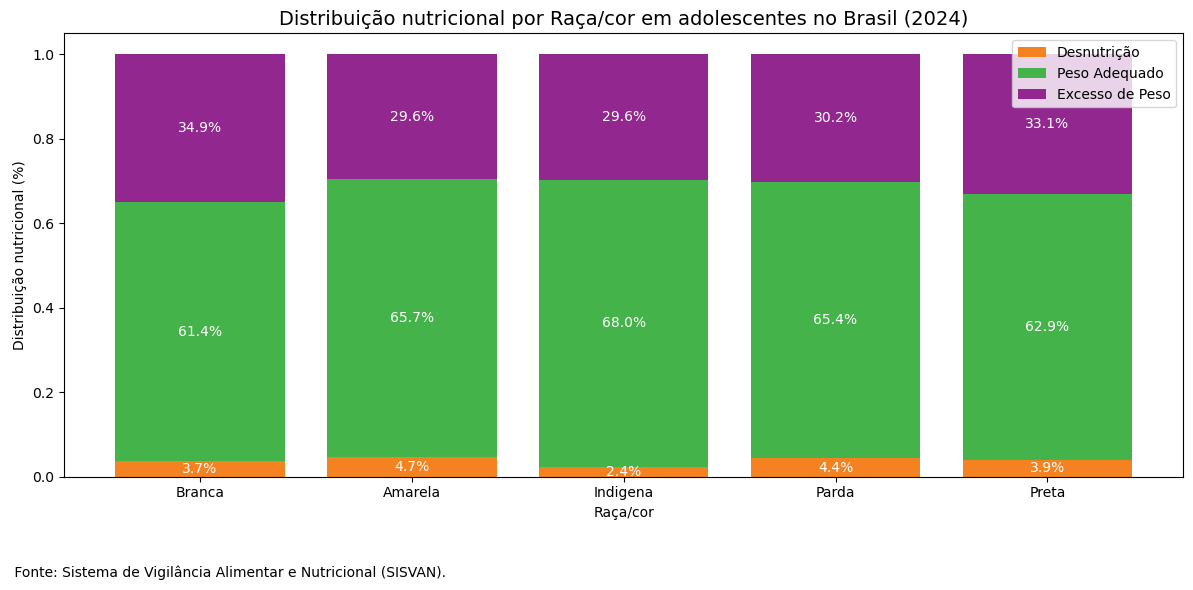

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(df_grafico['raca'], df_grafico['perc_total_desnutricao'], label='Desnutrição', color='#F58220')
ax.bar(df_grafico['raca'], df_grafico['perc_eutrofia'], bottom=df_grafico['perc_total_desnutricao'], label='Peso Adequado', color='#44B34A')
ax.bar(df_grafico['raca'], df_grafico['perc_total_obesidade'], bottom=df_grafico['perc_total_desnutricao'] + df_grafico['perc_eutrofia'], label='Excesso de Peso', color='#92278F')

for index, row in df_grafico.iterrows():
    plt.text(index, row['perc_total_desnutricao'] / 2, f"{row['perc_total_desnutricao']*100:.1f}%", 
             ha='center', va='center', color='white', fontsize=10)
    plt.text(index, row['perc_total_desnutricao'] + row['perc_eutrofia'] / 2, 
             f"{row['perc_eutrofia']*100:.1f}%", ha='center', va='center', color='white', fontsize=10)
    plt.text(index, row['perc_total_desnutricao'] + row['perc_eutrofia'] + row['perc_total_obesidade'] / 2, 
             f"{row['perc_total_obesidade']*100:.1f}%", ha='center', va='center', color='white', fontsize=10)
ax.set_title('Distribuição nutricional por Raça/cor em adolescentes no Brasil (2024)', fontsize=14)
ax.set_ylabel('Distribuição nutricional (%)')
ax.set_xlabel('Raça/cor')

ax.legend(loc='upper right')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.show()
